In [1]:
import pandas as pd
import matplotlib.pyplot as plt

apple_data = pd.read_csv("AppleStore.csv")
description = pd.read_csv("appleStore_description.csv")

In [2]:
apple_data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


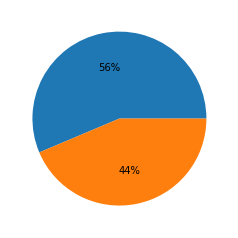

In [29]:
free_app = apple_data[apple_data["price"]==0]
paid_app = apple_data[apple_data["price"]>0]
plt.pie([free_app.id.count(),paid_app.id.count()],autopct='%1.0f%%');
#pie plot on free vs paid(#of apps), notice there is lot more portion of paid items.

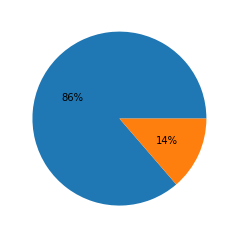

In [30]:
plt.pie([free_app.rating_count_tot.sum(),paid_app.rating_count_tot.sum()],autopct='%1.0f%%');

In [21]:
free_genre_profit = free_app.groupby("prime_genre")["rating_count_tot"].mean()
free_genre_count = free_app.groupby("prime_genre")["rating_count_tot"].count()
free_genre_df = pd.DataFrame({"profit":free_genre_profit,"count": free_genre_count})
free_genre_df.sort_values("profit",ascending=False)
#compared by rating counts

,profit,count
prime_genre,,
Reference,67447.900000,20
Music,56482.029851,67
Social Networking,53078.195804,143
Weather,47220.935484,31
Photo & Video,27249.892216,167
Navigation,25972.050000,20
Travel,20216.017857,56
Food & Drink,20179.093023,43
Sports,20128.974684,79


In [5]:
#calculate profit price * downloads
paid_app["profit"] = paid_app["price"]*paid_app["rating_count_tot"]

C:\Users\tivme\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
price_genre_profit = paid_app.groupby(["price","prime_genre"])["profit"].mean()
price_genre_count = paid_app.groupby(["price","prime_genre"])["profit"].count()
price_genre_df = pd.DataFrame({"Profit": price_genre_profit,"Count":price_genre_count})
price_genre_df.sort_values("Profit",ascending=False).head(10)

,,Profit,Count
price,prime_genre,,
249.99,Education,193242.270000,1
9.99,Music,152673.174000,5
8.99,Education,94700.660000,1
19.99,Reference,86836.560000,1
4.99,Weather,74490.720000,2
7.99,Games,72292.949286,14
74.99,Navigation,69515.730000,1
6.99,Productivity,56279.985000,6
9.99,Productivity,48616.041176,17
